# Models

## Import librairies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import category_encoders as ce
%matplotlib inline

# import Random Forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import os

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Data importations

In [4]:
df = pd.read_csv(r"C:\Users\Nathan\Desktop\Etude technique\Data.csv")

## Random Forest

### Exploratory data analysis

In [5]:
# view dimensions of dataset
df.shape

(366, 113)

In [6]:
# preview the dataset
df.head()

,Age,Dateexam,DDN,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,datePoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,datePoidsleplushaut,Poids6mois,DatedebutTCA,AgedebutTCA,DuréeTCA,AnorexiedetypeboulemieActuel,vomissementActuel(Nbrparjour),utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,vomissementPasse(nbrparjour),utilisationPasselaxatif,AnorexiedetyperestrictifPasse,nombreFracture,FracturedefaibleeNRJ1,cigarettes(nbrjour),alcool(nbverredjour),Drogues,Agedelamenarche,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Duréemoisdepuisdernièresmenstruations,Signehyperandrogenie,NbrGrossesse,NbrEnfant,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiqueActuelPratriquee1NbrHparsemaine,ActivitePhysiquePassePratriquee1,ActivitePhysiquePassePratriquee1NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,QR,VO2(ml/min),VCO2(ml/min),Lip(%),Glu(%),Pro(%),AzUr(g/j),MGrassekg,MMaigrekg,MMusculairekg,Depenseenergetiquedefond,Tour de taille,Tour de hanche,rapport taille/hanche,L1L4ZscoreSD,GrasBrasG,GrasBrasD,Gras2Bras,GrasbrasGpc,GrasbrasDpc,Gras2Braspc,MaigreBrasG,MaigreBrasD,Maigre2Bras,GrasTronc,GrasTroncpc,MaigreTroncT1,GrasJambeG,GrasJambeD,Gras2Jambes,GrasJambeGpc,GrasJambeDpc,Gras2jambesT1pc,MaigreJambeG,MaigreJambeD,Maigre2Jambes,GrasSoustotal,GrasSoustotalpc,MaigreSoustotal,GrasTete,GrasTetepc,MaigreTete,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,TSH(mIU/l),Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l),Fill Rate
0,16.586301,2008-11-28,1992-05-02,28.9,-4.0,168.0,1.0,10.23,26.0,-4.2,9.21,16.500000,2008-10-14,48.0,-0.5,17.01,15.5,2007-10-14,38.0,2007-10-14,15.460274,1.126027,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,16.586301,0.0,0.0,0.0,9.066667,0.0,0.0,0,0.0,0,0.0,0,0.0,900.0,-23.0,0.91,131.0,120.0,4.03,55.678794,39.966555,16.0,8.30,34.60,17.60,1179.0,53.0,68.0,0.78,-2.5,111.1,126.9,119.00,8.3,9.4,8.85,1139.3,1122.1,1130.70,735.5,5.4,12585.3,314.1,258.7,286.40,6.8,5.9,6.35,3976.0,3813.0,3894.50,1546.3,6.1,22635.8,698.8,19.8,2418.5,2245.1,7.8,25054.3,73.93,16.11,33.32,0.753,172.00,2.070,6.290,12.0,35.8,3.72,96.0,11.8,130.0,8.8,6.3,4.3,0.894737
1,19.989041,2008-11-28,1988-12-07,37.4,-2.5,164.0,0.1,13.91,37.0,-2.5,13.76,19.800000,2008-10-08,50.0,-0.5,18.59,17.1,2006-01-01,49.0,2008-07-01,19.578082,0.410959,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.500000,0.0,1.0,0.0,2.700000,0.0,0.0,0,0.0,0,0.0,0,2.0,830.0,-32.0,0.64,128.0,83.0,79.40,0.000000,20.596894,8.0,2.53,34.87,22.51,1232.0,59.0,74.0,0.80,0.0,339.5,232.0,285.75,17.0,11.3,14.15,1524.4,1683.9,1604.15,1437.9,8.5,14848.9,1056.2,1315.5,1185.85,16.6,20.5,18.55,4923.5,4726.7,4825.10,4381.1,13.0,27707.4,725.4,19.4,2510.6,5106.4,13.6,30218.0,65.21,36.51,14.51,0.342,45.21,1.950,11.210,11.9,36.2,3.66,99.0,14.3,272.0,7.8,2.5,3.2,0.947368
2,18.076712,2008-06-04,1990-05-12,41.8,-2.0,170.5,1.4,14.39,35.4,-3.0,12.18,18.076712,2008-07-08,54.0,0.0,18.58,17.1,2007-06-01,37.5,2007-10-01,17.400000,0.676712,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,14.000000,0.0,0.0,0.0,11.300000,0.0,0.0,0,1.0,1,2.0,1,2.0,930.0,-27.0,0.70,141.0,98.0,77.82,4.314381,18.175687,7.0,1.31,39.09,26.02,1321.0,60.0,76.0,0.79,-1.4,146.3,151.4,148.85,7.2,6.9,7.05,1760.2,1922.0,1841.10,940.4,4.6,19031.1,392.2,355.2,373.70,6.0,5.2,5.60,5846.2,6103.0,5974.60,1985.6,5.2,34662.4,744.9,19.7,2571.8,2730.4,6.5,37234.2,86.73,45.02,13.72,0.533,33.27,2.410,6.860,15.0,46.0,4.67,98.0,14.0,177.0,8.1,6.9,3.2,0.938596
3,16.495890,2009-01-07,1992-07-14,38.5,-2.2,152.0,-1.8,16.68,36.0,-1.0,15.58,13.500000,2006-01-01,40.0,-1.5,17.31,14.5,2007-01-01,36.5,2008-07-12,16.005479,0.490411,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.000000,0.0,0.0,1.0,0.06

### Drop useless column

In [7]:
colonnes_date =[
    'Dateexam',
    'DDN',
    'datePoidsleplusbas',
    'datePoidsleplushaut',
    'DatedebutTCA',
    'Datedernièresmenstruations'
]

# Convertir les colonnes de dates en type datetime dans df
numeric_columns = df.columns.difference(colonnes_date)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='ignore')
    

# Supprimer les lignes avec des valeurs NaN dans la colonne cible (y)
df = df.dropna(subset=['L1L4ZscoreSD'])

In [ ]:
binary_column= [
    "AnorexiedetypeboulemieActuel"
    "utilisationActuellaxatif"
    "Hyperactivite"
    "ActivitePhysiqueActuelPratriquee1 h/s"
    "ActivitePhysiquePassePratriquee1"
    
    
]

In [8]:
df.head()

,Age,Dateexam,DDN,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,datePoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,datePoidsleplushaut,Poids6mois,DatedebutTCA,AgedebutTCA,DuréeTCA,AnorexiedetypeboulemieActuel,vomissementActuel(Nbrparjour),utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,vomissementPasse(nbrparjour),utilisationPasselaxatif,AnorexiedetyperestrictifPasse,nombreFracture,FracturedefaibleeNRJ1,cigarettes(nbrjour),alcool(nbverredjour),Drogues,Agedelamenarche,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Duréemoisdepuisdernièresmenstruations,Signehyperandrogenie,NbrGrossesse,NbrEnfant,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiqueActuelPratriquee1NbrHparsemaine,ActivitePhysiquePassePratriquee1,ActivitePhysiquePassePratriquee1NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,QR,VO2(ml/min),VCO2(ml/min),Lip(%),Glu(%),Pro(%),AzUr(g/j),MGrassekg,MMaigrekg,MMusculairekg,Depenseenergetiquedefond,Tour de taille,Tour de hanche,rapport taille/hanche,L1L4ZscoreSD,GrasBrasG,GrasBrasD,Gras2Bras,GrasbrasGpc,GrasbrasDpc,Gras2Braspc,MaigreBrasG,MaigreBrasD,Maigre2Bras,GrasTronc,GrasTroncpc,MaigreTroncT1,GrasJambeG,GrasJambeD,Gras2Jambes,GrasJambeGpc,GrasJambeDpc,Gras2jambesT1pc,MaigreJambeG,MaigreJambeD,Maigre2Jambes,GrasSoustotal,GrasSoustotalpc,MaigreSoustotal,GrasTete,GrasTetepc,MaigreTete,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,TSH(mIU/l),Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l),Fill Rate
0,16.586301,2008-11-28,1992-05-02,28.9,-4.0,168.0,1.0,10.23,26.0,-4.2,9.21,16.500000,2008-10-14,48.0,-0.5,17.01,15.5,2007-10-14,38.0,2007-10-14,15.460274,1.126027,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,16.586301,0.0,0.0,0.0,9.066667,0.0,0.0,0,0.0,0,0.0,0,0.0,900.0,-23.0,0.91,131.0,120.0,4.03,55.678794,39.966555,16.0,8.30,34.60,17.60,1179.0,53.0,68.0,0.78,-2.5,111.1,126.9,119.00,8.3,9.4,8.85,1139.3,1122.1,1130.70,735.5,5.4,12585.3,314.1,258.7,286.40,6.8,5.9,6.35,3976.0,3813.0,3894.50,1546.3,6.1,22635.8,698.8,19.8,2418.5,2245.1,7.8,25054.3,73.93,16.11,33.32,0.753,172.00,2.070,6.290,12.0,35.8,3.72,96.0,11.8,130.0,8.8,6.3,4.3,0.894737
1,19.989041,2008-11-28,1988-12-07,37.4,-2.5,164.0,0.1,13.91,37.0,-2.5,13.76,19.800000,2008-10-08,50.0,-0.5,18.59,17.1,2006-01-01,49.0,2008-07-01,19.578082,0.410959,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.500000,0.0,1.0,0.0,2.700000,0.0,0.0,0,0.0,0,0.0,0,2.0,830.0,-32.0,0.64,128.0,83.0,79.40,0.000000,20.596894,8.0,2.53,34.87,22.51,1232.0,59.0,74.0,0.80,0.0,339.5,232.0,285.75,17.0,11.3,14.15,1524.4,1683.9,1604.15,1437.9,8.5,14848.9,1056.2,1315.5,1185.85,16.6,20.5,18.55,4923.5,4726.7,4825.10,4381.1,13.0,27707.4,725.4,19.4,2510.6,5106.4,13.6,30218.0,65.21,36.51,14.51,0.342,45.21,1.950,11.210,11.9,36.2,3.66,99.0,14.3,272.0,7.8,2.5,3.2,0.947368
2,18.076712,2008-06-04,1990-05-12,41.8,-2.0,170.5,1.4,14.39,35.4,-3.0,12.18,18.076712,2008-07-08,54.0,0.0,18.58,17.1,2007-06-01,37.5,2007-10-01,17.400000,0.676712,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,14.000000,0.0,0.0,0.0,11.300000,0.0,0.0,0,1.0,1,2.0,1,2.0,930.0,-27.0,0.70,141.0,98.0,77.82,4.314381,18.175687,7.0,1.31,39.09,26.02,1321.0,60.0,76.0,0.79,-1.4,146.3,151.4,148.85,7.2,6.9,7.05,1760.2,1922.0,1841.10,940.4,4.6,19031.1,392.2,355.2,373.70,6.0,5.2,5.60,5846.2,6103.0,5974.60,1985.6,5.2,34662.4,744.9,19.7,2571.8,2730.4,6.5,37234.2,86.73,45.02,13.72,0.533,33.27,2.410,6.860,15.0,46.0,4.67,98.0,14.0,177.0,8.1,6.9,3.2,0.938596
3,16.495890,2009-01-07,1992-07-14,38.5,-2.2,152.0,-1.8,16.68,36.0,-1.0,15.58,13.500000,2006-01-01,40.0,-1.5,17.31,14.5,2007-01-01,36.5,2008-07-12,16.005479,0.490411,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.000000,0.0,0.0,1.0,0.06

In [9]:
# check missing values in variables
df.isnull().sum()

Age                                                0
Dateexam                                           0
DDN                                                0
PoidsT1                                            0
PoidsSD                                            0
TailleT1                                           0
TailleSD                                           0
IMC1                                               0
Poidsleplusbas                                     0
DSPoidsleplusbas                                   0
IMCpoidsleplusbas                                  0
Agepoidsleplusbas                                  0
datePoidsleplusbas                                 0
Poidsleplushaut                                    0
DSPoidsleplushaut                                  0
IMCpoidsleplushaut                                 0
Agepoidsleplushaut                                 0
datePoidsleplushaut                                0
Poids6mois                                    

### Declare feature vector and target variable

In [10]:
X = df.drop(['L1L4ZscoreSD', 'Dateexam', 'DDN'], axis=1)

y = df['L1L4ZscoreSD']

### Split data into separate training and test set 

In [11]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((245, 110), (121, 110))

### Feature Engineering

In [13]:
# check data types in X_train
X_train.dtypes

Age                                                float64
PoidsT1                                            float64
PoidsSD                                            float64
TailleT1                                           float64
TailleSD                                           float64
IMC1                                               float64
Poidsleplusbas                                     float64
DSPoidsleplusbas                                   float64
IMCpoidsleplusbas                                  float64
Agepoidsleplusbas                                  float64
datePoidsleplusbas                                  object
Poidsleplushaut                                    float64
DSPoidsleplushaut                                  float64
IMCpoidsleplushaut                                 float64
Agepoidsleplushaut                                 float64
datePoidsleplushaut                                 object
Poids6mois                                         float

In [14]:
X_train.head()

,Age,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,datePoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,datePoidsleplushaut,Poids6mois,DatedebutTCA,AgedebutTCA,DuréeTCA,AnorexiedetypeboulemieActuel,vomissementActuel(Nbrparjour),utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,vomissementPasse(nbrparjour),utilisationPasselaxatif,AnorexiedetyperestrictifPasse,nombreFracture,FracturedefaibleeNRJ1,cigarettes(nbrjour),alcool(nbverredjour),Drogues,Agedelamenarche,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Duréemoisdepuisdernièresmenstruations,Signehyperandrogenie,NbrGrossesse,NbrEnfant,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiqueActuelPratriquee1NbrHparsemaine,ActivitePhysiquePassePratriquee1,ActivitePhysiquePassePratriquee1NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,QR,VO2(ml/min),VCO2(ml/min),Lip(%),Glu(%),Pro(%),AzUr(g/j),MGrassekg,MMaigrekg,MMusculairekg,Depenseenergetiquedefond,Tour de taille,Tour de hanche,rapport taille/hanche,GrasBrasG,GrasBrasD,Gras2Bras,GrasbrasGpc,GrasbrasDpc,Gras2Braspc,MaigreBrasG,MaigreBrasD,Maigre2Bras,GrasTronc,GrasTroncpc,MaigreTroncT1,GrasJambeG,GrasJambeD,Gras2Jambes,GrasJambeGpc,GrasJambeDpc,Gras2jambesT1pc,MaigreJambeG,MaigreJambeD,Maigre2Jambes,GrasSoustotal,GrasSoustotalpc,MaigreSoustotal,GrasTete,GrasTetepc,MaigreTete,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,TSH(mIU/l),Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l),Fill Rate
118,24.024658,42.55,-2.0,160.0,-0.5,16.29,37.0,-2.7,14.45,22.4,2010-02-01,58.0,0.9,22.66,16.8,2004-06-15,42.00,2001-09-11,14.010959,10.013699,1,3.0,0,0.0,0,0.0,0.0,1.0,1,0.0,0.0,3.0,1.0,0.0,13.0,0.0,1.0,1.0,0.433333,0.0,0.0,0,0.0,0,0.0,1,8.0,1090.0,-11.0,0.74,160.0,118.0,67.82,14.098079,18.175687,7.0,7.5,32.70,15.70,1111.0,61.0,80.0,0.762500,301.6,221.4,261.50,15.0,10.7,12.85,1576.1,1713.7,1644.90,1867.3,9.9,16451.6,1656.3,1622.9,1639.60,23.3,23.1,23.20,5051.0,4999.0,5025.00,5669.5,15.3,2979.7,854.5,18.8,2921.3,6524.0,15.7,32713.0,28.16,34.8,27.85,0.692,26.24,1.765,2.80,14.1,42.4,4.81,88.0,13.6,249.0,8.4,4.8,4.0,0.938596
31,44.136986,44.60,-1.6,163.0,0.0,16.77,41.5,-2.0,15.62,40.1,2005-10-01,54.0,1.0,20.32,14.0,1979-08-01,43.00,1979-08-01,13.950685,30.186301,0,0.0,0,0.0,1,1.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,10.5,0.0,0.0,0.0,1.200000,0.0,0.0,0,0.0,0,0.0,0,2.0,1010.0,-13.0,0.82,148.0,121.0,42.30,28.700000,29.600000,11.0,4.7,38.43,25.71,1307.0,65.0,79.0,0.820000,506.5,362.5,434.50,23.5,15.9,19.70,1536.2,1802.4,1669.30,2670.8,12.9,17681.0,2193.3,2228.9,2211.10,29.3,29.0,29.15,4996.6,5173.8,5085.20,7962.0,19.7,31190.0,816.1,19.5,2811.9,8778.2,19.7,34001.9,28.16,34.8,18.33,0.431,57.43,1.765,2.81,13.7,40.9,4.33,94.0,12.5,241.0,8.2,4.5,4.0,0.938596
36,15.967123,45.60,-1.1,165.0,0.5,16.76,39.9,-2.0,14.66,15.7,2009-08-01,48.5,0.0,17.81,14.1,2008-01-01,40.00,2008-01-01,14.084932,1.882192,0,0.0,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,12.733333,0.0,0.0,0,0.0,0,0.0,0,2.0,1250.0,-5.0,0.73,188.0,138.0,72.70,1.000000,28.000000,13.0,7.9,35.70,17.90,1212.0,64.0,80.0,0.800000,643.6,632.0,637.80,28.5,26.5,27.50,1469.5,1625.1,1547.30,3464.8,16.1,17602.0,1853.1,1954.9,1904.00,24.8,24.3,24.55,5271.1,5747.9,5509.50,8548.4,20.5,31715.7,795.6,19.9,2767.4,9344.0,20.5,34483.1,28.16,34.8,26.28,0.663,78.86,1.765,4.32,13.6,42.1,4.52,93.0,12.0,294.0,7.4,5.1,3.9,0.938596
285,30.082192,42.55,-1.9,153.0,-1.9,17.90,32.0,-3.8,13.67,28.3,2013-08-15,44.0,-1.6,18.80,15.0,2000-05-01,43.00,2013-01-15,27.758904,2.323288,0,0.0,0,0.0,0,0.0,0.0,0.0,1,2.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,23.233333,0.0,0.0,0,0.0,1,2.0,1,20.0,1119.0,-7.0,0.88,160.0,141.0,29.70,53.400000,16.900000,6.8,12.2,30.20,15.40,1027.0,64.

In [15]:
col_names = df.columns
col_X = [col for col in col_names if col != "L1L4ZscoreSD"]

In [16]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(col_X)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,Age,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,datePoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,datePoidsleplushaut,Poids6mois,DatedebutTCA,AgedebutTCA,DuréeTCA,AnorexiedetypeboulemieActuel,vomissementActuel(Nbrparjour),utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,vomissementPasse(nbrparjour),utilisationPasselaxatif,AnorexiedetyperestrictifPasse,nombreFracture,FracturedefaibleeNRJ1,cigarettes(nbrjour),alcool(nbverredjour),Drogues,Agedelamenarche,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Duréemoisdepuisdernièresmenstruations,Signehyperandrogenie,NbrGrossesse,NbrEnfant,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiqueActuelPratriquee1NbrHparsemaine,ActivitePhysiquePassePratriquee1,ActivitePhysiquePassePratriquee1NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,QR,VO2(ml/min),VCO2(ml/min),Lip(%),Glu(%),Pro(%),AzUr(g/j),MGrassekg,MMaigrekg,MMusculairekg,Depenseenergetiquedefond,Tour de taille,Tour de hanche,rapport taille/hanche,GrasBrasG,GrasBrasD,Gras2Bras,GrasbrasGpc,GrasbrasDpc,Gras2Braspc,MaigreBrasG,MaigreBrasD,Maigre2Bras,GrasTronc,GrasTroncpc,MaigreTroncT1,GrasJambeG,GrasJambeD,Gras2Jambes,GrasJambeGpc,GrasJambeDpc,Gras2jambesT1pc,MaigreJambeG,MaigreJambeD,Maigre2Jambes,GrasSoustotal,GrasSoustotalpc,MaigreSoustotal,GrasTete,GrasTetepc,MaigreTete,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,TSH(mIU/l),Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l),Fill Rate
118,24.024658,42.55,-2.0,160.0,-0.5,16.29,37.0,-2.7,14.45,22.4,1,58.0,0.9,22.66,16.8,1,42.00,1,14.010959,10.013699,1,3.0,1,1,0,0.0,0.0,1.0,1,0.0,0.0,3.0,1.0,0.0,13.0,0.0,1.0,1.0,0.433333,0.0,0.0,1,0.0,0,0.0,1,8.0,1090.0,-11.0,0.74,160.0,118.0,67.82,14.098079,18.175687,7.0,7.5,32.70,15.70,1111.0,61.0,80.0,0.762500,301.6,221.4,261.50,15.0,10.7,12.85,1576.1,1713.7,1644.90,1867.3,9.9,16451.6,1656.3,1622.9,1639.60,23.3,23.1,23.20,5051.0,4999.0,5025.00,5669.5,15.3,2979.7,854.5,18.8,2921.3,6524.0,15.7,32713.0,28.16,34.8,27.85,0.692,26.24,1.765,2.80,14.1,42.4,4.81,88.0,13.6,249.0,8.4,4.8,4.0,0.938596
31,44.136986,44.60,-1.6,163.0,0.0,16.77,41.5,-2.0,15.62,40.1,2,54.0,1.0,20.32,14.0,2,43.00,2,13.950685,30.186301,0,0.0,1,1,1,1.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,10.5,0.0,0.0,0.0,1.200000,0.0,0.0,1,0.0,0,0.0,0,2.0,1010.0,-13.0,0.82,148.0,121.0,42.30,28.700000,29.600000,11.0,4.7,38.43,25.71,1307.0,65.0,79.0,0.820000,506.5,362.5,434.50,23.5,15.9,19.70,1536.2,1802.4,1669.30,2670.8,12.9,17681.0,2193.3,2228.9,2211.10,29.3,29.0,29.15,4996.6,5173.8,5085.20,7962.0,19.7,31190.0,816.1,19.5,2811.9,8778.2,19.7,34001.9,28.16,34.8,18.33,0.431,57.43,1.765,2.81,13.7,40.9,4.33,94.0,12.5,241.0,8.2,4.5,4.0,0.938596
36,15.967123,45.60,-1.1,165.0,0.5,16.76,39.9,-2.0,14.66,15.7,3,48.5,0.0,17.81,14.1,3,40.00,3,14.084932,1.882192,0,0.0,1,1,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,12.733333,0.0,0.0,1,0.0,0,0.0,0,2.0,1250.0,-5.0,0.73,188.0,138.0,72.70,1.000000,28.000000,13.0,7.9,35.70,17.90,1212.0,64.0,80.0,0.800000,643.6,632.0,637.80,28.5,26.5,27.50,1469.5,1625.1,1547.30,3464.8,16.1,17602.0,1853.1,1954.9,1904.00,24.8,24.3,24.55,5271.1,5747.9,5509.50,8548.4,20.5,31715.7,795.6,19.9,2767.4,9344.0,20.5,34483.1,28.16,34.8,26.28,0.663,78.86,1.765,4.32,13.6,42.1,4.52,93.0,12.0,294.0,7.4,5.1,3.9,0.938596
285,30.082192,42.55,-1.9,153.0,-1.9,17.90,32.0,-3.8,13.67,28.3,4,44.0,-1.6,18.80,15.0,4,43.00,4,27.758904,2.323288,0,0.0,1,1,0,0.0,0.0,0.0,1,2.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,23.233333,0.0,0.0,1,0.0,1,2.0,1,20.0,1119.0,-7.0,0.88,160.0,141.0,29.70,53.400000,16.900000,6.8,12.2,30.20,15.40,1027.0,64.0,82.0,0.780488,321.0,286.6,303.80,16.3,13.9,15.10,1542.9,1662.0,1602.45,1890.2,10.0,16521.0,1711.2,1814.3,1762.75,2

In [18]:
X_test.head()

,Age,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,datePoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,datePoidsleplushaut,Poids6mois,DatedebutTCA,AgedebutTCA,DuréeTCA,AnorexiedetypeboulemieActuel,vomissementActuel(Nbrparjour),utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,vomissementPasse(nbrparjour),utilisationPasselaxatif,AnorexiedetyperestrictifPasse,nombreFracture,FracturedefaibleeNRJ1,cigarettes(nbrjour),alcool(nbverredjour),Drogues,Agedelamenarche,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Duréemoisdepuisdernièresmenstruations,Signehyperandrogenie,NbrGrossesse,NbrEnfant,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiqueActuelPratriquee1NbrHparsemaine,ActivitePhysiquePassePratriquee1,ActivitePhysiquePassePratriquee1NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,QR,VO2(ml/min),VCO2(ml/min),Lip(%),Glu(%),Pro(%),AzUr(g/j),MGrassekg,MMaigrekg,MMusculairekg,Depenseenergetiquedefond,Tour de taille,Tour de hanche,rapport taille/hanche,GrasBrasG,GrasBrasD,Gras2Bras,GrasbrasGpc,GrasbrasDpc,Gras2Braspc,MaigreBrasG,MaigreBrasD,Maigre2Bras,GrasTronc,GrasTroncpc,MaigreTroncT1,GrasJambeG,GrasJambeD,Gras2Jambes,GrasJambeGpc,GrasJambeDpc,Gras2jambesT1pc,MaigreJambeG,MaigreJambeD,Maigre2Jambes,GrasSoustotal,GrasSoustotalpc,MaigreSoustotal,GrasTete,GrasTetepc,MaigreTete,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,TSH(mIU/l),Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l),Fill Rate
193,15.490411,42.55,-2.3,152.0,-1.8,15.84,36.3,-2.1,15.71,15.400000,-1.0,42.0,-1.2,18.18,15.1,73.0,42.0,-1.0,15.010959,0.479452,0,0.0,1.0,1,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,1.0,2.833333,1.0,0.0,1,0.0,1,1.0,0,0.0,1125.0,-7.3,0.78,165.0,129.0,64.4,18.1,17.5,7.1,6.30,30.50,14.30,1037.0,62.0,78.0,0.794872,403.1,335.4,369.25,22.3,16.3,19.30,1300.4,1610.5,1455.45,1857.8,11.8,13427.9,2035.3,1690.4,1862.85,30.5,25.7,28.10,4344.3,4587.2,4465.75,6322.0,19.3,25270.3,754.5,19.9,2616.2,7076.5,19.3,27886.5,17.00,62.00,35.15,1.300,71.72,3.180,3.63,13.4,39.6,4.18,95.0,16.0,214.0,8.3,5.6,3.9,0.991228
33,20.709589,51.20,-0.4,171.0,1.9,17.51,44.0,-1.6,15.05,16.900000,13.0,58.0,0.8,19.84,17.9,30.0,55.0,-1.0,17.010959,3.698630,1,1.0,1.0,1,0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,45.833333,0.0,0.0,1,0.0,0,0.0,1,1.0,990.0,-28.0,0.90,142.0,128.0,21.0,63.1,16.5,6.0,7.09,44.41,7.09,1433.0,66.0,83.0,0.800000,611.2,618.5,614.85,21.7,21.0,21.35,2043.5,2159.1,2101.30,3320.5,14.2,19570.5,2745.6,2834.2,2789.90,31.8,30.3,31.05,5499.4,6129.3,5814.35,10130.0,21.5,35402.1,802.8,19.9,2780.6,10932.8,21.4,38182.7,28.16,34.80,20.37,0.712,50.37,1.765,3.87,13.8,42.3,4.75,89.0,16.0,230.0,9.2,3.4,4.3,0.903509
15,17.602740,49.20,-0.8,173.0,1.9,16.45,46.0,-1.0,15.37,15.400000,197.0,49.2,-0.5,16.44,17.6,-1.0,48.0,144.0,11.350685,6.252055,0,0.0,1.0,1,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.000000,0.0,0.0,1,0.0,1,2.0,1,2.0,1390.0,2.0,0.75,205.0,155.0,75.7,12.9,11.8,6.0,16.38,41.31,27.00,1368.0,64.0,81.0,0.790000,461.2,471.6,466.40,19.4,17.2,18.30,1785.4,2115.1,1950.25,2490.0,11.7,18135.0,2522.5,2827.1,2674.80,27.2,29.5,28.35,6336.8,6361.7,6349.25,8772.4,19.4,34734.0,805.9,19.8,2808.1,9578.4,19.5,37542.1,100.00,5.48,42.68,1.170,156.60,1.765,10.47,13.3,39.8,4.24,94.0,13.7,241.0,8.6,4.8,4.3,0.859649
310,33.868493,42.55,-3.0,151.0,-2.1,15.44,35.0,-3.1,15.35,33.600000,80.0,45.0,-1.5,19.74,26.3,31.0,36.6,30.0,26.279452,7.589041,0,0.0,1.0,1,1,0.0,0.0,0.0,1,0.0,0.0,20.0,0.0,0.0,12.0,0.0,1.0,1.0,0.366667,0.0,6.0,4,0.0,0,0.0,1,3.0,1158.0,3.8,0.87,166.0,146.0,33.2,43.5,23.3,9.0,4.90,30.30,13.60,1030.0,59.0,77.0,0.766234,260.7,265.3,263.00,12.9,13.2,13.05,1664.0,1642.1,1653.05,1737.9,9.7,15712.7,

### Random Forest Classifier model with default parameters

In [19]:
from sklearn.metrics import mean_squared_error

# instantiate the classifier 
rfc = RandomForestRegressor(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)


# Check mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error with 10 decision-trees : {0:0.4f}'.format(mse))

Mean Squared Error with 10 decision-trees : 1.6509


### Random Forest Classifier model with parameter n_estimators=100

In [20]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)


# Check mean squared error
mse = mean_squared_error(y_test, y_pred_100)
print('Mean Squared Error with 10 decision-trees : {0:0.4f}'.format(mse))

Mean Squared Error with 10 decision-trees : 1.6509


### Find important features with Random Forest model 

                                   Feature  Importance
62                   rapport taille/hanche    0.182843
8                        IMCpoidsleplusbas    0.096688
7                         DSPoidsleplusbas    0.066566
6                           Poidsleplusbas    0.066502
38   Duréemoisdepuisdernièresmenstruations    0.051571
19                                DuréeTCA    0.033785
16                              Poids6mois    0.029592
88                              GrasTetepc    0.029114
97                                    PINP    0.019099
2                                  PoidsSD    0.018568
102                  Globule rouge 10^12/l    0.015641
95                              OCT(roche)    0.012366
104                  coeff d'anisocytose %    0.012017
0                                      Age    0.009565
105                       plaquette 10^9/l    0.009011
4                                 TailleSD    0.008983
5                                     IMC1    0.008626
98        

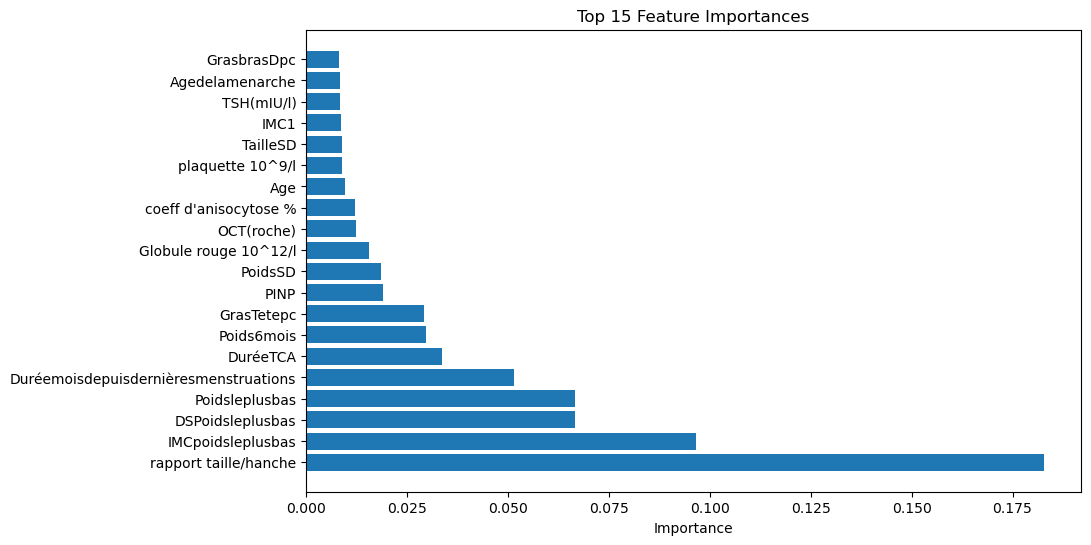

In [21]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rfc.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_features = feature_importance_df.head(20)

# Display the top 15 features
print(top_features)

# Plot the feature importances for the top 15 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances')
plt.show()

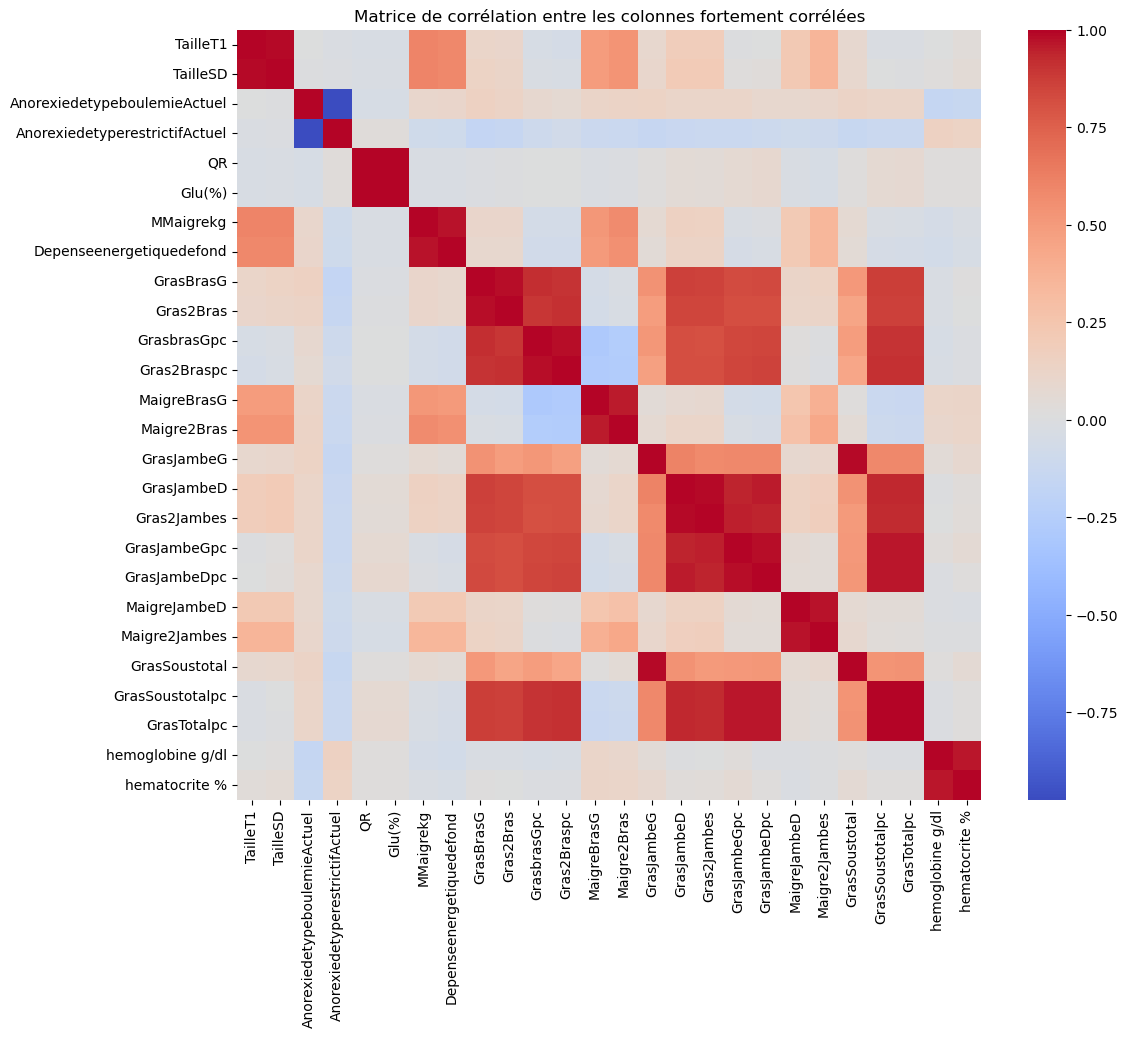

In [27]:
# Sélectionner les colonnes numériques
colonnes_numeriques = df.select_dtypes(include=[np.number]).columns.tolist()

# Définir les colonnes à inclure dans le calcul de la corrélation
columns_to_include = [col for col in colonnes_numeriques if col not in colonnes_date]

# Calculer la matrice de corrélation
correlation_matrix = df[columns_to_include].corr()

# Définir le seuil de corrélation (par exemple, 0.8)
correlation_threshold = 0.95

# Filtrer la matrice de corrélation pour ne montrer que les valeurs au-dessus du seuil
high_correlation_pairs = np.where(np.abs(correlation_matrix) > correlation_threshold)

# Récupérer les indices des colonnes corrélées
correlated_columns_indices = set()
for col1, col2 in zip(*high_correlation_pairs):
    if col1 != col2 and col1 not in correlated_columns_indices and col2 not in correlated_columns_indices:
        correlated_columns_indices.add(col1)
        correlated_columns_indices.add(col2)

# Extraire les noms des colonnes corrélées
correlated_columns = correlation_matrix.columns[list(correlated_columns_indices)]

# Créer une nouvelle matrice de corrélation avec seulement les colonnes corrélées
subset_correlation_matrix = correlation_matrix.loc[correlated_columns, correlated_columns]

# Créer une figure et un axe
plt.figure(figsize=(12, 10))

# Tracer la matrice de corrélation avec seaborn
sns.heatmap(subset_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

# Afficher le graphique
plt.title('Matrice de corrélation entre les colonnes fortement corrélées')
plt.show()


## Lasso